In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import display
import skimage.segmentation as seg
import skimage.color as color
from scipy import ndimage as ndi
from skimage.feature import peak_local_max

import skimage
from skimage import io
from skimage.color import rgb2gray
import skimage.segmentation as seg
from scipy import ndimage
import skimage.morphology as morph
from skimage.feature import peak_local_max
from skimage import filters
from skimage.morphology import disk, ball
from skimage.util import img_as_ubyte
from skimage import exposure

import copy


In [31]:
grain1_name='Ultra_Co6_2-040.jpg'
grain2_name='Ultra_Co11-2.jpg'
grain3_name='Ultra_Co25-1.jpg'

doggo1_name='doggo1.jpg'
doggo2_name='doggo2.jpg'
doggo3_name='doggo3.jpg'
doggo4_name='doggo4.jpg'

coins_name='coins.jpg'
circ_name='circ.jpg'

path='images'

grain1=io.imread(path+'/'+grain1_name).astype('uint8')
grain2=io.imread(path+'/'+grain2_name).astype('uint8')
grain3=io.imread(path+'/'+grain3_name).astype('uint8')

coins=io.imread(path+'/'+coins_name).astype('uint8')
circ=io.imread(path+'/'+circ_name).astype('uint8')

doggo1=io.imread(path+'/'+doggo1_name).astype('uint8')
doggo2=io.imread(path+'/'+doggo2_name).astype('uint8')
doggo3=io.imread(path+'/'+doggo3_name).astype('uint8')
doggo4=io.imread(path+'/'+doggo4_name).astype('uint8')

In [ ]:
grain1.shape

In [ ]:
doggo1.shape

# Gaussian filter

In [ ]:
filtered=ndi.gaussian_filter(img2,0)
plt.figure(figsize=(15, 15))
#io.imshow(filtered)

# Otsu's binarization

In [ ]:
def do_otsu(img,N=20):
    image=rgb2gray(img)
    
    global_thresh=skimage.filters.threshold_otsu(image)
    binary_global = image > global_thresh
    

   # ax1.imshow(img,cmap='gray')
    plt.figure(figsize=(N,N))
    plt.imshow(binary_global,cmap='gray')
    plt.show()
    


In [ ]:
do_otsu(grain1,N=15)
do_otsu(grain2,N=15)
do_otsu(grain3,N=15)


In [ ]:
do_otsu(doggo1,N=7)
do_otsu(coins,10)

# Watershed 

In [ ]:
def do_watershed(image,N=20):
    

    segmented = seg.watershed(image)
    fig, ax = plt.subplots(ncols=1, figsize=(N,N), sharex=True, sharey=True)
    
    ax.imshow(segmented, cmap=plt.cm.gray)
    ax.set_title('segmented')

    plt.show()


In [ ]:
do_watershed(grain1,10)
#do_watershed(grain2,10)
#do_watershed(grain3,10)

edt - Euclidean Distance Transform

In [18]:
def do_watershed_edt(image,N=50):
    image=rgb2gray(image)
    global_thresh=skimage.filters.threshold_otsu(image)
    bin_image = image > global_thresh

    distance = ndi.distance_transform_edt(bin_image)
    distance_copy=copy.copy(distance)
    
    coords = peak_local_max(distance_copy, footprint=np.ones((3, 3)), labels=image.astype('int32')).astype('int64')
    
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    
    labels = seg.watershed(-distance, markers, mask=image)
    labels=labels.astype('uint8')


  
    fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(20,20))
    ax = axes.ravel()
    
    
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Overlapping objects')
    
    ax[1].imshow(bin_image, cmap=plt.cm.gray)
    ax[1].set_title('binary image')
    
    ax[2].imshow(distance, cmap=plt.cm.gray)
    ax[2].set_title('Distances')
    
    
    ax[3].imshow(labels, cmap=plt.cm.nipy_spectral)
    ax[3].set_title('Separated objects')
    

#plt.show()

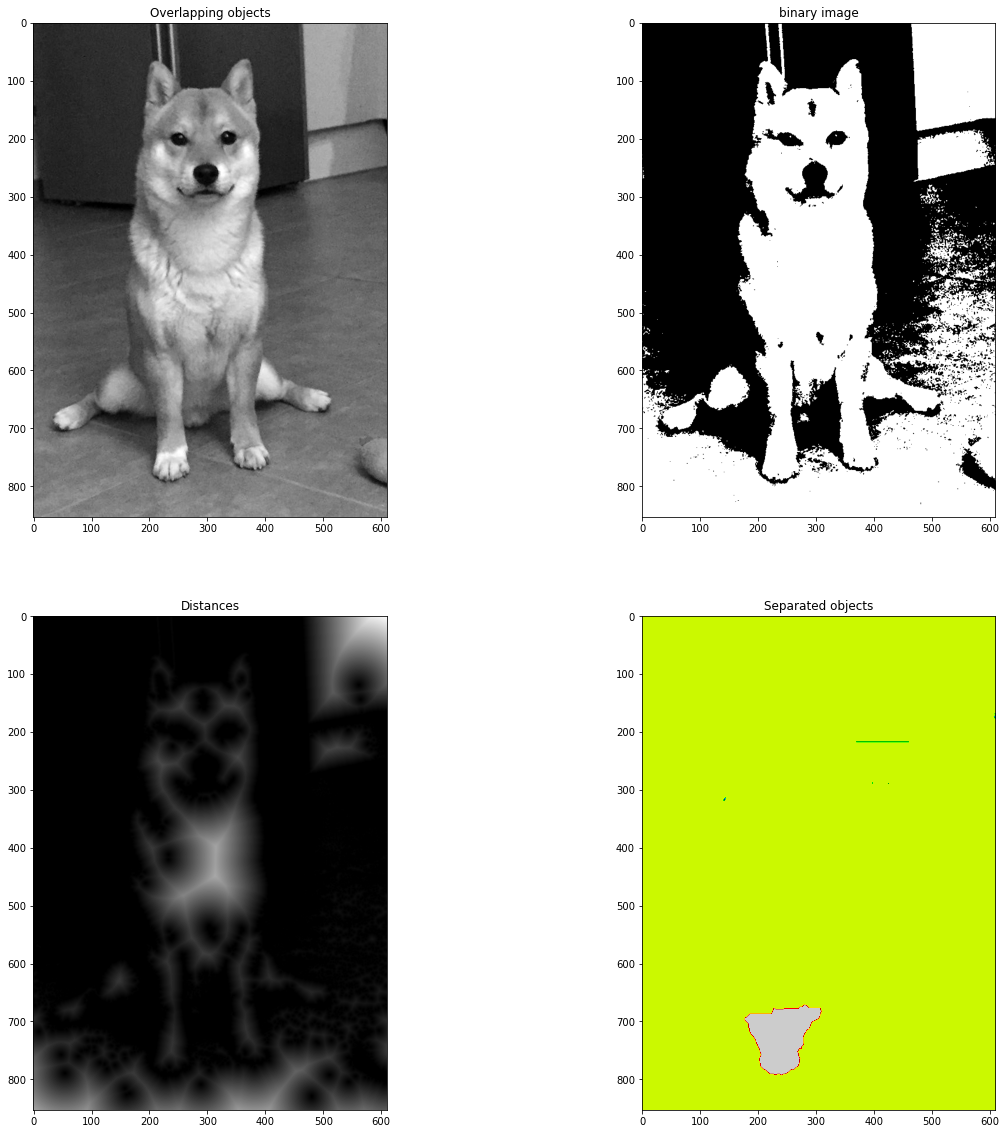

In [19]:
do_watershed_edt(doggo1,2)

In [26]:
#do_watershed_edt(grain1,15)

In [27]:
#do_watershed_edt(grain2,15)

In [28]:
#do_watershed_edt(grain3,15)

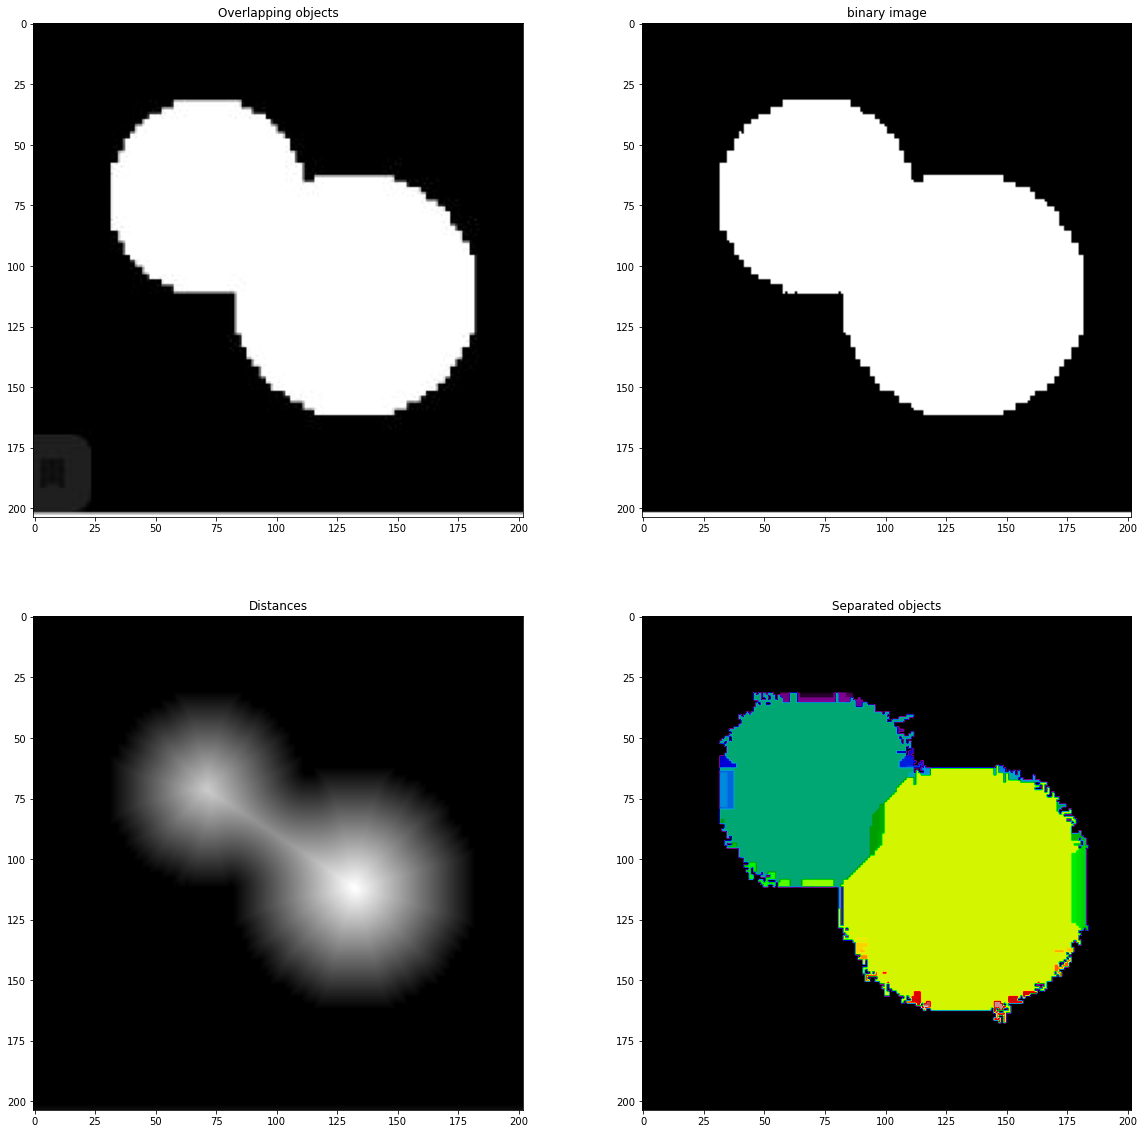

In [32]:
do_watershed_edt(circ,10)

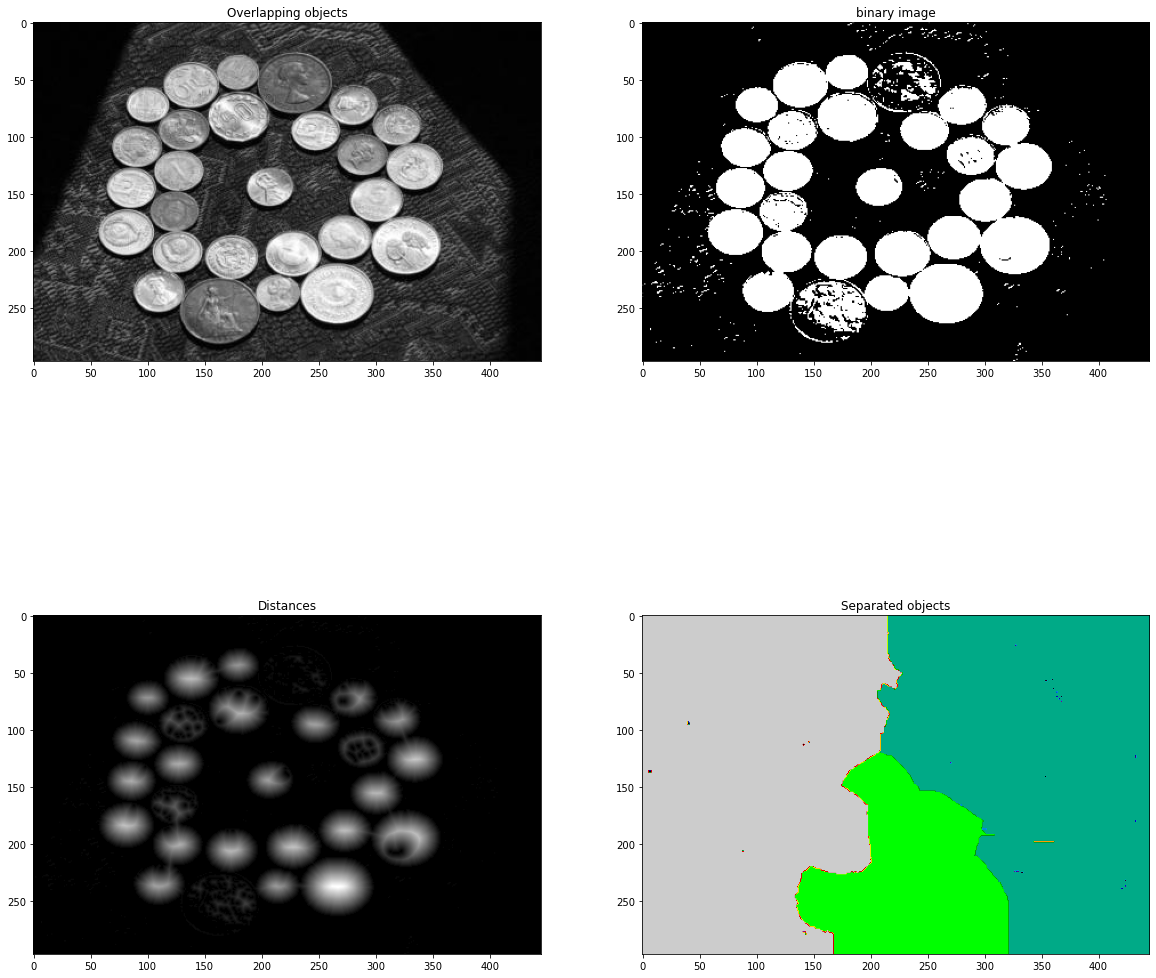

In [20]:
do_watershed_edt(coins,10)

## Rank filters
https://scikit-image.org/docs/dev/auto_examples/applications/plot_rank_filters.html#sphx-glr-auto-examples-applications-plot-rank-filters-py

In [ ]:
denoised4 = filters.rank.autolevel_percentile(grain1, selem=disk(5), p0=.4, p1=.9)
N=20
plt.figure(figsize=(N,N))
io.imshow(denoised4, cmap=plt.cm.gray)

In [ ]:
denoised4 = filters.rank.enhance_contrast(image, disk(2))
N=20
plt.figure(figsize=(N,N))
io.imshow(denoised4, cmap=plt.cm.gray)

In [ ]:
denoised4 = filters.rank.enhance_contrast(image, disk(2))
denoised5 = filters.rank.gradient(grain1, disk(1))
N=20
plt.figure(figsize=(N,N))
io.imshow(denoised5, cmap=plt.cm.gray)

In [ ]:
denoised5 = filters.rank.entropy(image, disk(2))
N=20
plt.figure(figsize=(N,N))
io.imshow(denoised5, cmap=plt.cm.gray)

In [ ]:
image =rgb2gray(grain2)
# denoise image
denoised1 = filters.rank.median(image, disk(3))
denoised2 = exposure.equalize_hist(image/255)
denoised3 =  filters.rank.equalize(image, disk(100))
denoised4 = filters.rank.autolevel_percentile(image, selem=disk(20), p0=.2, p1=.7)

N=30

fig, axes = plt.subplots( nrows=5, figsize=(N, N),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[1].imshow(denoised1, cmap=plt.cm.gray)
ax[2].imshow(denoised2, cmap=plt.cm.gray)
ax[3].imshow(denoised3, cmap=plt.cm.gray)
ax[4].imshow(denoised4, cmap=plt.cm.gray)


plt.show()

In [ ]:
image =rgb2gray(grain2)
# denoise image
#denoised = filters.rank.median(image, disk(3))
#denoised =  filters.rank.equalize(image, disk(50))
denoised = exposure.equalize_hist(image/255)

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = filters.rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = filters.rank.gradient(denoised, disk(1))

# process the watershed
labels = seg.watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [ ]:
#do_watershed(grain1)
do_watershed(doggo2)
#do_watershed(img3)

# Floodfill


In [ ]:
img = cv2.imread(door, cv2.IMREAD_GRAYSCALE);
new_img=seg.flood_fill(img,(1,1),100)
N=10
plt.figure(figsize=(N, N))
plt.imshow(new_img)

In [ ]:
def do_floodfill(image_name,N=50):
    # Read image
    img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE);
    N=20
    # Threshold.
    # Set values equal to or above 220 to 0.
    # Set values below 220 to 255.
    th, im_th = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Copy the thresholded image.
    im_floodfill = im_th.copy()

    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = im_th.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 150);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = im_th | im_floodfill_inv

    # Display images.

    fig, (ax1, ax2,ax3,ax4) = plt.subplots(
        nrows=4, ncols=1,
        figsize=(N,N)
        )

    ax1.imshow(im_th)
    ax1.set_title("Thesholded")
    ax2.imshow(im_floodfill)
    ax2.set_title("Floodfilled Image")
    ax3.imshow(im_floodfill_inv)
    ax3.set_title("Inverted Floodfilled Image")
    ax4.imshow(im_out)
    ax4.set_title("Foreground")

In [ ]:
do_floodfill(img_name_2,N=20)

# K-means

In [ ]:
def do_kmeans(img_name,N=20,K=10):
    img = cv2.imread(img_name)
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 50
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))

    fig, ax1 = plt.subplots(
        nrows=1, ncols=1,
        figsize=(N,N)
        )

    ax1.imshow(res2)
    ax1.set_title("K-means")

In [ ]:
do_kmeans(img_name=img_name_1,N=10,K=10)
do_kmeans(img_name=img_name_2,N=10,K=10)

# Felzenszwalb

In [ ]:
img = cv2.imread(doggo)
image_f = seg.felzenszwalb(img) 
plt.imshow(image_f)
np.unique(image_f).size

In [ ]:
image_f_c = color.label2rgb(image_f, img, kind='avg')
plt.imshow(image_f_c)